In [27]:
#Import required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [28]:
#An example image to numpy aray
img = mpimg.imread('../input/satellite-image-classification/data/cloudy/train_10081.jpg')
print(img)

[[[153 148 137 255]
  [153 148 138 255]
  [153 148 139 255]
  ...
  [161 158 147 255]
  [161 158 147 255]
  [162 158 147 255]]

 [[153 148 137 255]
  [153 148 138 255]
  [153 148 140 255]
  ...
  [161 158 147 255]
  [161 158 147 255]
  [162 158 147 255]]

 [[153 148 137 255]
  [153 148 139 255]
  [153 148 140 255]
  ...
  [161 158 147 255]
  [161 158 147 255]
  [162 158 147 255]]

 ...

 [[151 146 136 255]
  [150 146 136 255]
  [150 146 136 255]
  ...
  [158 156 144 255]
  [158 157 143 255]
  [159 157 142 255]]

 [[151 147 135 255]
  [150 146 135 255]
  [150 146 135 255]
  ...
  [159 156 145 255]
  [160 157 144 255]
  [160 158 143 255]]

 [[151 147 134 255]
  [151 146 134 255]
  [150 146 134 255]
  ...
  [160 157 146 255]
  [161 158 145 255]
  [161 158 144 255]]]


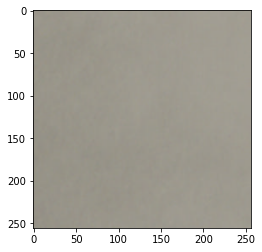

In [29]:
#Lets plot the image
imgplot = plt.imshow(img)

In [30]:
# I am using InceptionV3!
# Lets build the ML model
import tensorflow as tf
from keras.models import Sequential
from keras.models import Model
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from sklearn.metrics import classification_report

def custom_relu(x):
    return 1/(K.sigmoid(x)*2)-1

base_model = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(150, 150,3))
base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.2))
add_model.add(Dense(2, 
                    activation=custom_relu))
add_model.add(Dropout(0.2))
add_model.add(Dense(4, 
                    activation='softmax'))

model = add_model
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4, 
              momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 4098      
_________________________________________________________________
dropout_9 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
Total params: 21,806,894
Trainable params: 4,110
Non-trainable params: 21,802,784
______________________________________

In [31]:
#Using ImageDataGenerator to create labels based on the folder name

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

#Normalize the data

#Using Augmentaion
image_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest', 
      validation_split=0.2,)

train_dataset = image_datagen.flow_from_directory(batch_size=32,
                                                 directory='../input/satellite-image-classification/data',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_datagen.flow_from_directory(batch_size=32,
                                                 directory='../input/satellite-image-classification/data',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')


Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [ ]:
history = model.fit(
            train_dataset,
            epochs=50,
            validation_data=validation_dataset,
            )

Epoch 1/50
141/141 [==============================] - 49s 318ms/step - loss: 1.3910 - accuracy: 0.2617 - val_loss: 1.3752 - val_accuracy: 0.2931
Epoch 2/50
141/141 [==============================] - 41s 290ms/step - loss: 1.3731 - accuracy: 0.3092 - val_loss: 1.3571 - val_accuracy: 0.3837
Epoch 3/50
141/141 [==============================] - 41s 294ms/step - loss: 1.3570 - accuracy: 0.3638 - val_loss: 1.3449 - val_accuracy: 0.4059
Epoch 4/50
141/141 [==============================] - 41s 288ms/step - loss: 1.3478 - accuracy: 0.3747 - val_loss: 1.3342 - val_accuracy: 0.4236
Epoch 5/50
141/141 [==============================] - 41s 290ms/step - loss: 1.3300 - accuracy: 0.4162 - val_loss: 1.3195 - val_accuracy: 0.4440
Epoch 6/50
141/141 [==============================] - 41s 291ms/step - loss: 1.3166 - accuracy: 0.4222 - val_loss: 1.3045 - val_accuracy: 0.4645
Epoch 7/50
141/141 [==============================] - 41s 294ms/step - loss: 1.3072 - accuracy: 0.4366 - val_loss: 1.2905 - val_ac

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'train_dataset' is not defined